<a href="https://colab.research.google.com/github/Richardjmorton/colab/blob/master/mnist_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization 
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
mnist = tf.keras.datasets.mnist


In [3]:
(x_train, ytrain), (x_test, y_test) = mnist.load_data()

x_train = x_train/255.
x_test = x_test/255.

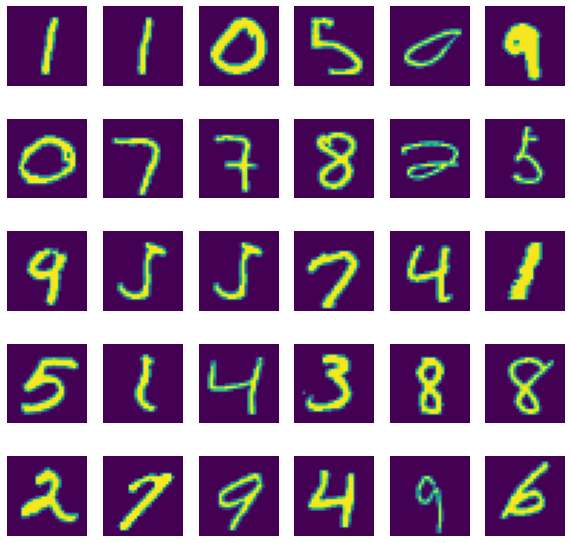

In [4]:
fig, ax = plt.subplots(5,6, figsize=(10,10))

x = stats.uniform.rvs(scale=60000, size=30)
x = x.astype(int)
for axes, j in zip(ax.flatten(), x):
    axes.imshow(x_train[j,:,:])
    axes.set_axis_off()
    axes.set_xlabel(str(ytrain[j]))

In [5]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
# Build model
def build_model(nn=20, nl=2, activation=None):
  model = Sequential()
  model.add(Dense(nn, activation=activation, input_shape=(28*28,)))
  model.add(BatchNormalization())

  for i in range(nl):
    model.add(Dense(nn, activation=activation))
    model.add(BatchNormalization())

  model.add(Dense(10, activation='softmax'))
  return model

model = build_model(activation='relu')

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                15700     
_________________________________________________________________
batch_normalization_3 (Batch (None, 20)                80        
_________________________________________________________________
dense_9 (Dense)              (None, 20)                420       
_________________________________________________________________
batch_normalization_4 (Batch (None, 20)                80        
_________________________________________________________________
dense_10 (Dense)             (None, 20)                420       
_________________________________________________________________
batch_normalization_5 (Batch (None, 20)                80        
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [19]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
hist = model.fit(x_train.reshape(60000,28*28), ytrain, validation_split=0.2, epochs=10, batch_size=50)

Epoch 1/10
960/960 [==============================] - 2s 2ms/step - loss: 1.6715 - accuracy: 0.8178 - val_loss: 1.5520 - val_accuracy: 0.9154
Epoch 2/10
960/960 [==============================] - 2s 2ms/step - loss: 1.5546 - accuracy: 0.9126 - val_loss: 1.5376 - val_accuracy: 0.9258
Epoch 3/10
960/960 [==============================] - 2s 2ms/step - loss: 1.5397 - accuracy: 0.9252 - val_loss: 1.5283 - val_accuracy: 0.9350
Epoch 4/10
960/960 [==============================] - 2s 2ms/step - loss: 1.5320 - accuracy: 0.9320 - val_loss: 1.5255 - val_accuracy: 0.9369
Epoch 5/10
960/960 [==============================] - 2s 2ms/step - loss: 1.5280 - accuracy: 0.9353 - val_loss: 1.5195 - val_accuracy: 0.9430
Epoch 6/10
960/960 [==============================] - 2s 2ms/step - loss: 1.5245 - accuracy: 0.9385 - val_loss: 1.5185 - val_accuracy: 0.9438
Epoch 7/10
960/960 [==============================] - 2s 2ms/step - loss: 1.5236 - accuracy: 0.9385 - val_loss: 1.5154 - val_accuracy: 0.9463
Epoch 

In [14]:
x_train.reshape(60000,28*28).shape

(60000, 784)

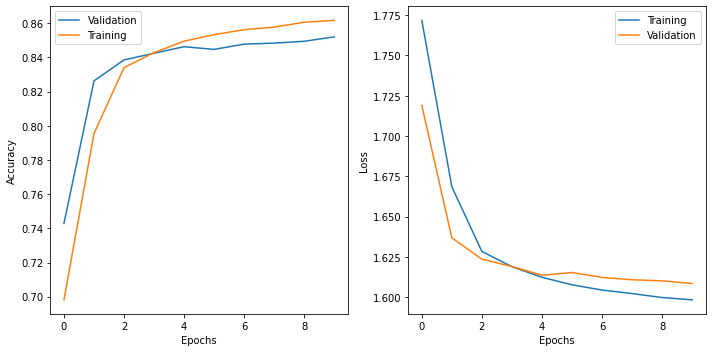

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(hist.history['val_accuracy'], label='Validation')
ax[0].plot(hist.history['accuracy'], label="Training")
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(hist.history['loss'], label="Training")
ax[1].plot(hist.history['val_loss'], label='Validation')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()

In [22]:
?mnist.load_data

In [11]:
initial_weights = model.get_weights()

train_acs = []
test_acs = []

test_size = [1000, 5000, 10000, 20000]

for tests in test_size:

    # set training set size
    x_train_small = x_train[0:tests]
    y_train_small = ytrain[0:tests]

    # re-initialise untraind weights
    model.set_weights(initial_weights)
    model.fit(x_train_small.reshape(tests,28*28), y_train_small, epochs=100,
              callbacks=[EarlyStopping(monitor='loss', patience=1)], verbose=0)
    
    train_acs.append( model.evaluate(x_train_small.reshape(tests,28*28), y_train_small, verbose=0)[1])

    test_acs.append(model.evaluate(x_test.reshape(10000,28*28), y_test, verbose=0)[1])

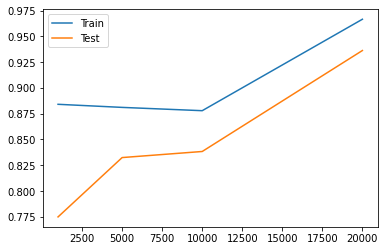

In [13]:
plt.plot(test_size, train_acs, label='Train')
plt.plot(test_size, test_acs, label='Test')
plt.legend()